<a href="https://colab.research.google.com/github/zecevicmato/OSRV-Projektni_zadatak/blob/main/OSRV_Skeniranje_studentske_iskaznice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pillow
!pip install easyocr

In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import dlib
from PIL import ImageDraw
from PIL import Image
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['hr'],gpu=False)

In [ ]:
#učitavanje slike X-ice i convertanje iz jpg-a u png
img_convert = Image.open(r"/content/sample_data/zecevic_nova.jpg")
img_convert.save(r"/content/sample_data/zecevic_nova.png")

In [ ]:
img = PIL.Image.open("/content/sample_data/zecevic_nova.jpg")

In [ ]:
text = reader.readtext("/content/sample_data/zecevic_nova.png")

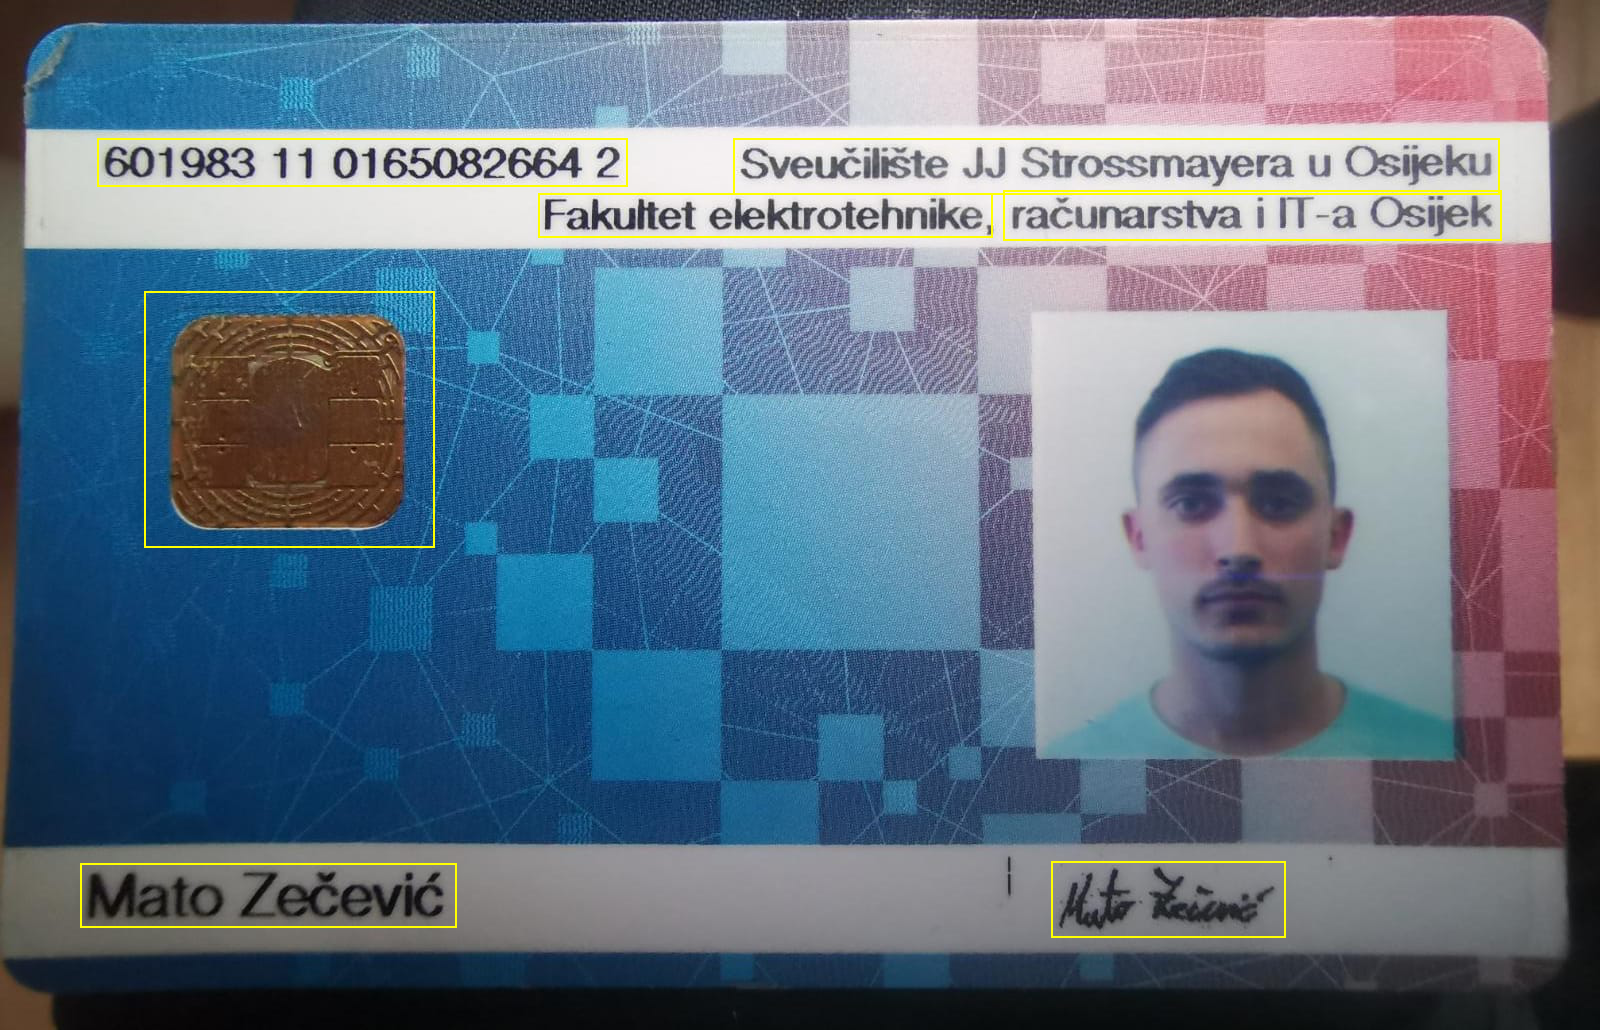

In [ ]:
def draw_boxes(image,text,color='yellow',width=2):
  draw = ImageDraw.Draw(image)
  for word in text:
    p0,p1,p2,p3 = word[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
  return image
draw_boxes(img,text)

In [ ]:
df = pd.DataFrame(text, columns=['bbox','text','conf'])

In [ ]:
df

bbox  \
0     [[98, 138], [626, 138], [626, 186], [98, 186]]   
1  [[734, 138], [1498, 138], [1498, 194], [734, 1...   
2   [[539, 193], [991, 193], [991, 237], [539, 237]]   
3  [[1004, 190], [1500, 190], [1500, 240], [1004,...   
4   [[145, 291], [433, 291], [433, 547], [145, 547]]   
5     [[81, 863], [455, 863], [455, 927], [81, 927]]   
6  [[1052, 861], [1284, 861], [1284, 937], [1052,...   

                                    text      conf  
0                 601983 11 0165082664 2  0.958351  
1  Sveucilište JJ Strossmayera u Osijeku  0.866984  
2                Fakultet elektrotehnike  0.784754  
3              racunarstva i IT-a Osijek  0.673683  
4                                      2  0.247406  
5                           Mato Zecevié  0.556569  
6                              AfF Yaene  0.017814

In [ ]:
if len(df) < 6:
  JMBAG = df.iloc[0][1]
  Sveuciliste = df.iloc[1][1]
  Fakultet = df.iloc[2][1]
  Ime = df.iloc[3][1]
  print("JMBAG:", JMBAG)
  print("Sveučilište: ",Sveuciliste)
  print("Fakultet: ",Fakultet)
  print("Ime i prezime: ",Ime)

elif len(df)==6:
  JMBAG = df.iloc[0][1] + " " + df.iloc[1][1]
  Sveuciliste = df.iloc[2][1]
  Fakultet = df.iloc[3][1]
  Ime = df.iloc[4][1]
  print("JMBAG:", JMBAG)
  print("Sveučilište: ",Sveuciliste)
  print("Fakultet: ",Fakultet)
  print("Ime i prezime: ",Ime)
  
else:
  print("Vaša studentska iskaznica nije pravilno uslikana, molimo Vas uslikajte ponovno!")




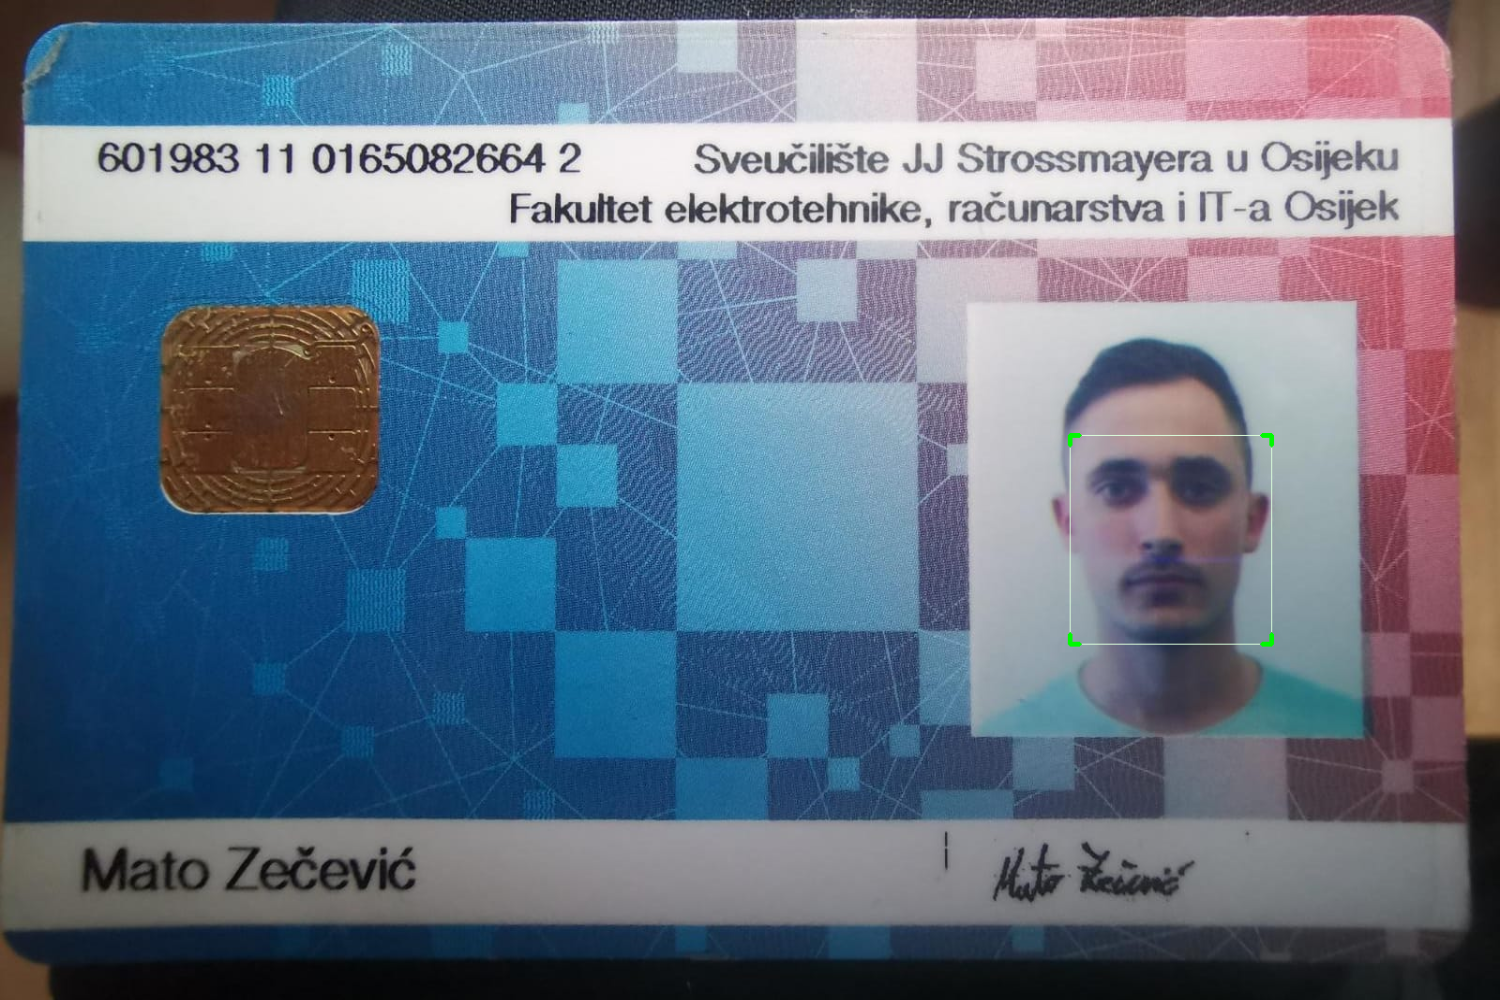

Vaša slika je spremljena!


In [ ]:
detector = dlib.get_frontal_face_detector()
new_path ='/content/sample_data/user_photo/'

#crtanje pravokutnika
def rectangle(rgb,x,y,w,h,v=20,color=(200,0,0),thikness =2):
    cv2.line(rgb, (x,y),(x+v,y), color, thikness)
    cv2.line(rgb, (x,y),(x,y+v), color, thikness)

    cv2.line(rgb, (x+w,y),(x+w-v,y), color, thikness)
    cv2.line(rgb, (x+w,y),(x+w,y+v), color, thikness)

    cv2.line(rgb, (x,y+h),(x,y+h-v), color, thikness)
    cv2.line(rgb, (x,y+h),(x+v,y+h), color, thikness)

    cv2.line(rgb, (x+w,y+h),(x+w,y+h-v), color, thikness)
    cv2.line(rgb, (x+w,y+h),(x+w-v,y+h), color, thikness)

def save(image,name, bbox, width=200,height=230):
    x, y, w, h = bbox
    imgCrop = image[y:h, x: w]
    imgCrop = cv2.resize(imgCrop, (width, height))
    cv2.imwrite(name+".jpg", imgCrop)

def faces():
    frame = cv2.imread('/content/sample_data/zecevic_nova.jpg')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    fit_width = 55
    fit_height_down = 70
    fit_height_up = 100
    # detect the face
    for counter,face in enumerate(faces):
        x1, y1 = face.left(), face.top()
        x2, y2 = face.right(), face.bottom()
        save(frame,new_path+str(counter),(x1-fit_width,y1-fit_height_up,x2+fit_width,y2+fit_height_down))

    cv2.rectangle(frame,(x1,y1),(x2,y2),(220,255,220),1)      
    rectangle(frame, x1, y1, x2 - x1, y2 - y1, 10, (0,250,0), 3)      
    frame = cv2.resize(frame,(1500,1000))
    cv2_imshow(frame)
    print("Vaša slika je spremljena!")


faces()